### EIRS PROJECT

**Project goal: In this project I built a pipeline to collect and analyze the sentimento of Reddit discussions related to tariffs and international trade duties.**

1. Data Extraction

2. Data Cleaning and Visualizazion

3. Sentiment Analysis




Libraries set up

In [ ]:
!pip install praw pandas
import praw
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.3 MB/s eta 0:00:00


**Data Extraction**

Using the PRAW library, I connected to Reddit’s API with a specified client ID, secret, and user agent. I defined a list of relevant keywords such as "tariff," "import duty," "customs duty," along with translations like "dazi," "arancel," and "zoll," to capture a broad range of discussions.

The script searched across all subreddits, retrieving up to 931 postsand 2200 comments.

For each **post**, I extracted important information like the title, author, score, creation date, URL, full text, and the keyword it matched.

For each **comment**, I extracted important information like author, score, creation time and body of the comment.

 After gathering the data, I compiled it into a Pandas DataFrame, removed duplicate posts, and saved the cleaned dataset as a CSV file.

In [ ]:
# Setup Reddit API
reddit = praw.Reddit(
    client_id="_k-37giDm7diWeLu5Jfuhw",
    client_secret="_jOvfM-XgA6jdjDc2mK8XbtXt8XAxw",
    user_agent="EIRSproj sentiment scraper"
)

# Keywords to search
keywords = [
    "tariff", "tariffs", "import duty", "customs duty", "trade tax",
    "import tax", "export tax", "dazi", "droit de douane", "arancel", "zoll"
]

subreddit_name = "all"
limit_per_query = 100
max_comments_per_post = 2

pattern = re.compile(
    r"\b(tariff\w*|import duty|customs duty|trade tax|import tax|export tax|dazi|droit de douane|arancel|zoll)\b",
    re.IGNORECASE
)

posts_data = []
comments_data = []

for keyword in keywords:
    print(f" Looking for: {keyword}")
    results = reddit.subreddit(subreddit_name).search(keyword, limit=limit_per_query)
    for post in results:
        # Collect post info
        posts_data.append({
            "post_id": post.id,
            "title": post.title,
            "author": str(post.author),
            "score": post.score,
            "created_utc": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
            "url": post.url,
            "text": post.selftext,
            "matched_keyword": keyword
        })

        # Load only top N comments
        post.comments.replace_more(limit=0)
        count = 0
        for comment in post.comments.list():
            if count >= max_comments_per_post:
                break
            comments_data.append({
                "post_id": post.id,
                "comment_id": comment.id,
                "comment_author": str(comment.author),
                "comment_score": comment.score,
                "comment_created_utc": datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                "comment_body": comment.body
            })
            count += 1

# Save posts
posts_df = pd.DataFrame(posts_data)
posts_df.drop_duplicates(subset=["url"], inplace=True)
posts_df.to_csv("reddit_tariffs_posts.csv", index=False, encoding='utf-8')
print(f" Exported {len(posts_df)} posts.")

# Save comments
comments_df = pd.DataFrame(comments_data)
comments_df.to_csv("reddit_tariffs_comments.csv", index=False, encoding='utf-8')
print(f" Exported {len(comments_df)} comments.")



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



 Looking for: tariff


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Looking for: tariffs


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Looking for: import duty


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Looking for: customs duty


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Looking for: trade tax


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Looking for: import tax


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Looking for: export tax


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Looking for: dazi


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Looking for: droit de douane


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Looking for: arancel


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Looking for: zoll


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

 Exported 939 posts.
 Exported 2200 comments.


**Data Cleaning**

I loaded the dataset and began cleaning it further, removing any duplicate entries, filtered out posts without meaningful titles or text, and eliminated rows where both fields were missing.
I then applied a custom text cleaning function to strip out URLs, extra spaces, and unnecessary line breaks, ensuring that the data were ready for analysis.



In [ ]:
# Load Data
posts_df = pd.read_csv("reddit_tariffs_posts.csv")
comments_df = pd.read_csv("reddit_tariffs_comments.csv")

print(posts_df.info())
print(comments_df.info())

# Cleaning Posts

# Remove duplicates
posts_df.drop_duplicates(inplace=True)

# Remove posts without significant title or text
posts_df = posts_df[(posts_df['title'].str.strip() != '') | (posts_df['text'].str.strip() != '')]

# Remove null values
posts_df.dropna(subset=['title', 'text'], how='all', inplace=True)

# Clean text function
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text.strip()

# Apply cleaning
posts_df['title'] = posts_df['title'].apply(clean_text)
posts_df['text'] = posts_df['text'].apply(clean_text)

# Cleaning Comments

# Remove duplicates
comments_df.drop_duplicates(inplace=True)

# Remove comments without significant body
comments_df = comments_df[comments_df['comment_body'].str.strip() != '']

# Remove null values
comments_df.dropna(subset=['comment_body'], how='any', inplace=True)

# Apply cleaning
comments_df['comment_body'] = comments_df['comment_body'].apply(clean_text)


**Data Visualization**

In the visualization section, firstly I gave a general look on some entries of the dataset. Then I generatated some interesting charts, for example the keyword that matched more frequently, the distribution of posts over the years and the days with the highest number of posts.

Then, for a more "qualitative" look, I displayed the top 10 posts based on engagment.

In [ ]:
posts_df.head(10)

post_id                                              title  \
0  1kegofs  Trump supporter shocked to discover who actual...   
1  1kkmkkz  China, US agree to drop tariffs by 115% for 90...   
2  1ka4pvv  LOOK AT THIS TARIFF CHARGE.  WHAT DO YOU THINK...   
3  1jq0el5  Can someone please tell me why these tariffs a...   
4  1kdad91    MEGATHREAD 3: USA TARIFFS and SHIPPING CONCERNS   
5  1kbgdis  US economy slows sharply, shrinking 0.3% in th...   
6  1kf0bqa  Trump announces 100% tariffs on all foreign-pr...   
7  1j3l8v1      MAGA fan learns what "tariffs" actually means   
8  1kggx1i  So with the introduction of all these tariffs ...   
9  1kouolx  Trump criticizes Walmart for blaming tariffs d...   

                 author  score          created_utc  \
0  Busy-Government-1041  37360  2025-05-04 10:26:25   
1              newsweek  32306  2025-05-12 07:26:51   
2      It_Could_Be_True  22425  2025-04-28 19:47:45   
3            Stockjock1   4309  2025-04-02 21:29:09   
4  chau-a-not-chau-bcdf    501  2025-05-02 20:02:28   
5         RightWingNest   4092  2025-04-30 13:22:41   
6           Wesdawg1241   1642  2025-05-05 01:52:00   
7               ambachk  13418  2025-03-04 20:52:55   
8     Government_Remote     25  2025-05-06 21:55:18   
9         callsonreddit  51789  2025-05-17 14:46:00   

                                                 url  \
0                https://i.redd.it/05h66z05sqye1.png   
1  https://www.newsweek.com/china-us-agree-drop-t...   
2               https://i.redd.it/p5pw69vpomxe1.jpeg   
3  https://www.reddit.com/r/Conservative/comments...   
4  https://www.reddit.com/r/AsianBeauty/comments/...   
5  https://www.foxbusiness.com/economy/us-economy...   
6  https://www.foxnews.com/politics/trump-announc...   
7                    https://v.redd.it/rhvj4f1dkqme1   
8               https://i.redd.it/tnuqhiywg8ze1.jpeg   
9               https://i.redd.it/m16d36dcuc1f1.jpeg   

                                                text matched_keyword  
0                                                             tariff  
1                                                             tariff  
2  JENNIFER PRICE'S TEMU ORDER: "This is kinda ra...          tariff  
3  Can someone tell me why it's not fair to impos...          tariff  
4  Hello all, now that we have arrived at doomsda...          tariff  
5                                                             tariff  
6                                                             tariff  
7                                                             tariff  
8  Freight forwarders, drop shipping from a third...          tariff  
9  Source: [https://truthsocial.com/@realDonaldTr...          tariff

In [ ]:
comments_df.head(10)

post_id comment_id        comment_author  comment_score  \
0  1kegofs    mqilt1r    ChoiceMedicine1462            303   
1  1kegofs    mqioi3a              FaleBure            300   
2  1kkmkkz    mrvlfh5         AutoModerator              1   
3  1kkmkkz    mrvquac             Sionn3039            686   
4  1ka4pvv    mpje9ub  ComprehensiveHold382            852   
5  1ka4pvv    mpjgli1      Difficult-Ad2682            607   
6  1jq0el5    ml41lgk              Dutchtdk            426   
7  1jq0el5    ml40n2c     queen_nefertiti33            471   
8  1kdad91    mq9gadi            BeeWhisper            485   
9  1kdad91    mq9i2op        isaidnocookies            165   

   comment_created_utc                                       comment_body  
0  2025-05-04 10:49:13  He loves t\n\n![gif](giphy|X3nnss8PAj5aU|downs...  
1  2025-05-04 11:13:37  How can people this stupid exist, drive cars, ...  
2  2025-05-12 07:26:51  Users often report submissions from this site ...  
3  2025-05-12 08:25:10  The hundreds of people my company laid off las...  
4  2025-04-28 19:53:13  Republican say - "We can make this locally," o...  
5  2025-04-28 20:04:43  You mean the consumer is paying the tariffs? T...  
6  2025-04-02 23:26:36  What are the currency manipulations and trade ...  
7  2025-04-02 23:21:18  A few notable countries left off the list... \...  
8  2025-05-02 20:42:46  Thanks mods for making this thread. \n\nSummar...  
9  2025-05-02 20:51:30  Goodbye Yesstyle, my beloved. I will no longer...

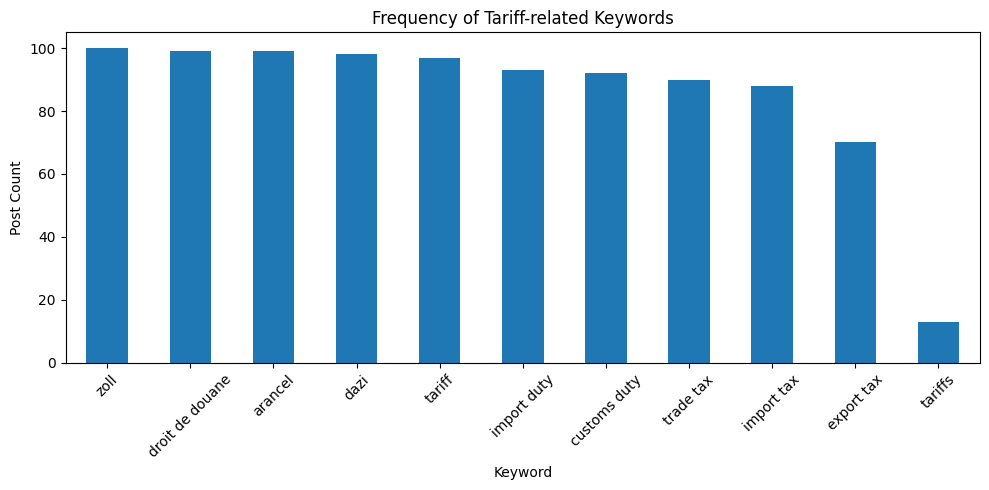

In [ ]:
# Most frequent keywords

posts_df['matched_keyword'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Frequency of Tariff-related Keywords")
plt.xlabel("Keyword")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

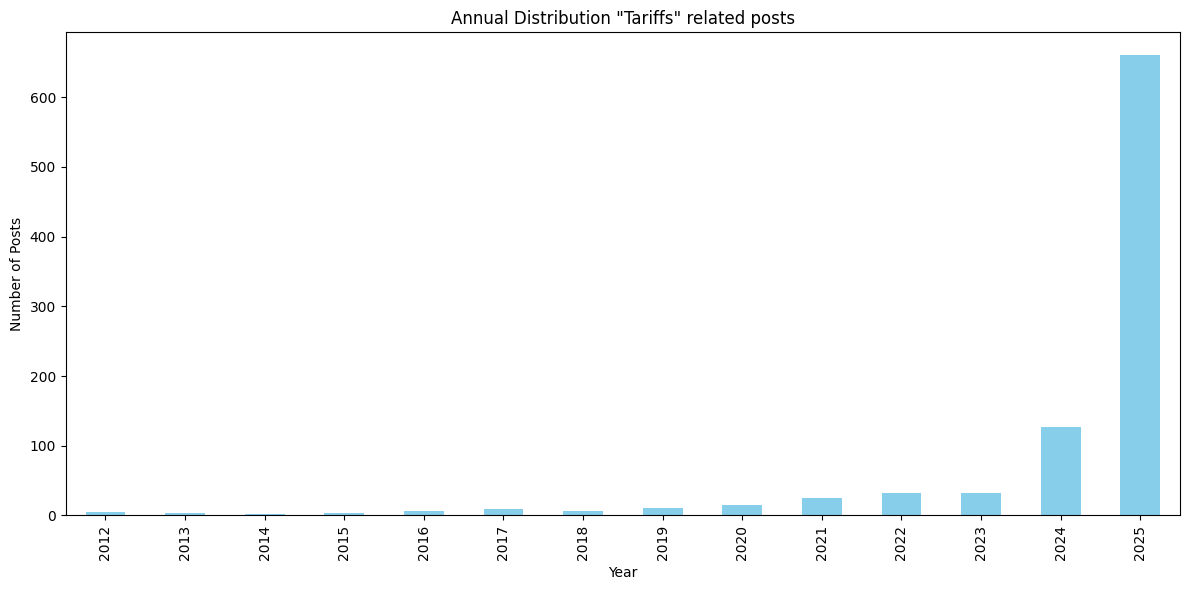

In [ ]:
# Post distribution over the years

created_dt = pd.to_datetime(posts_df['created_utc'])

yearly_counts = (
    posts_df.assign(created_year=created_dt.dt.to_period('Y'))
      .groupby('created_year')
      .size()
)

# Plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Annual Distribution "Tariffs" related posts')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()


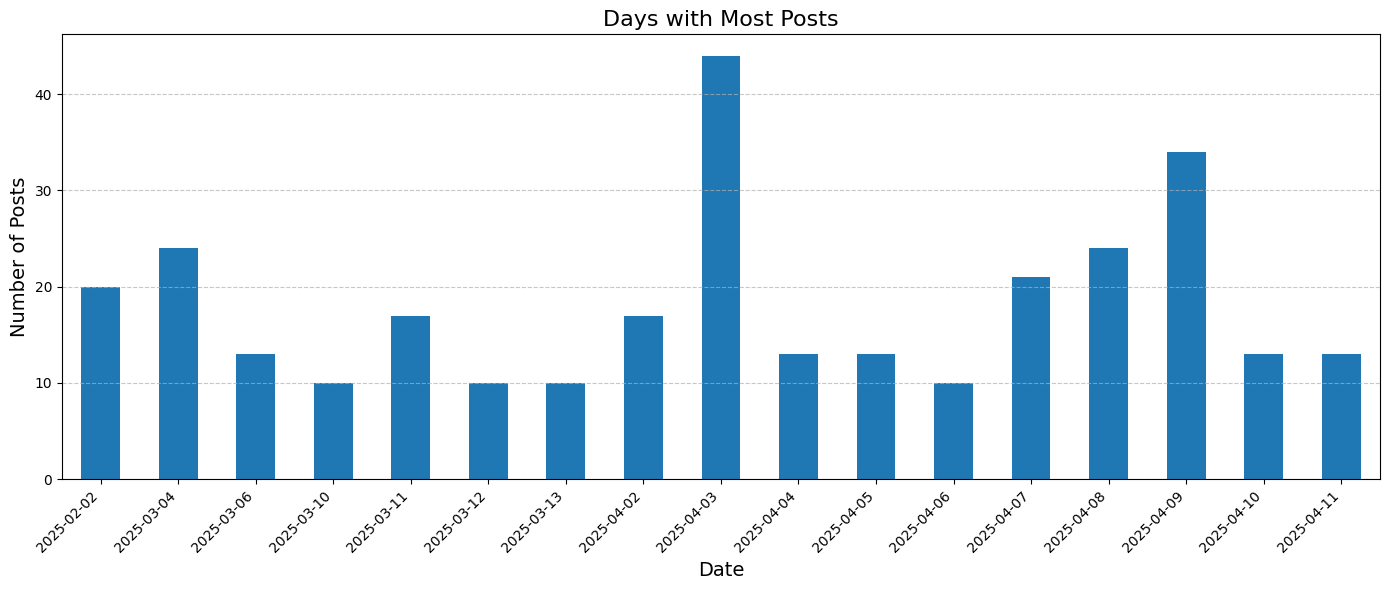

In [ ]:
# Convert 'created_utc' to datetime
posts_df['created_utc'] = pd.to_datetime(posts_df['created_utc'])

# Count posts per day
daily_counts = posts_df['created_utc'].dt.date.value_counts()
daily_counts = daily_counts.sort_index()

# Filter days with at least 10 posts
filtered_daily_counts = daily_counts[daily_counts >= 10]

# Plot
plt.figure(figsize=(14, 6))
filtered_daily_counts.plot(kind='bar')

plt.title("Days with Most Posts", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

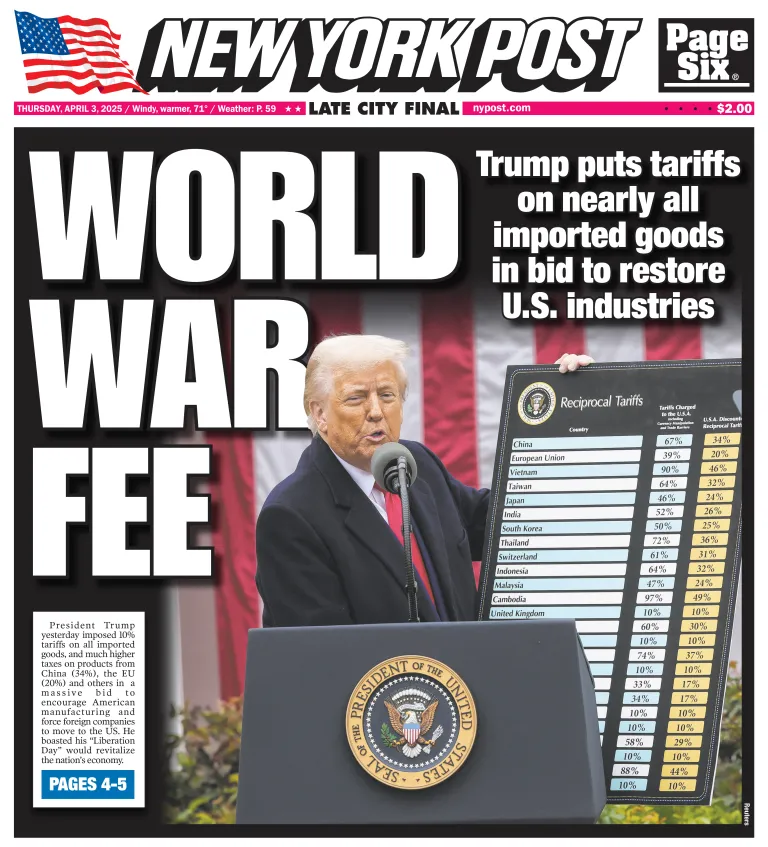

Top 10 Most Engaging Reddit Posts on Tariffs:

                                                                                                                                                                                 title              author  score         created_utc matched_keyword
                                                                                                                           Trudeau announcing retaliatory tariffs on the United States Mysterious_Mud_3908 137590 2025-02-02 03:03:29          tariff
                                                        Liquor Stores in British Columbia have pulled alcohol from Republican states off the shelves in response to the Trump tariffs.           VonPursey 136611 2025-02-02 23:58:36         tariffs
                                                                           “It’s done, it’s gone”: Ontario Premier Doug Ford cancels $100-million Starlink contract in tariff response           malcolm58 124576 2025-

<ipython-input-9-7228d61f34e8>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


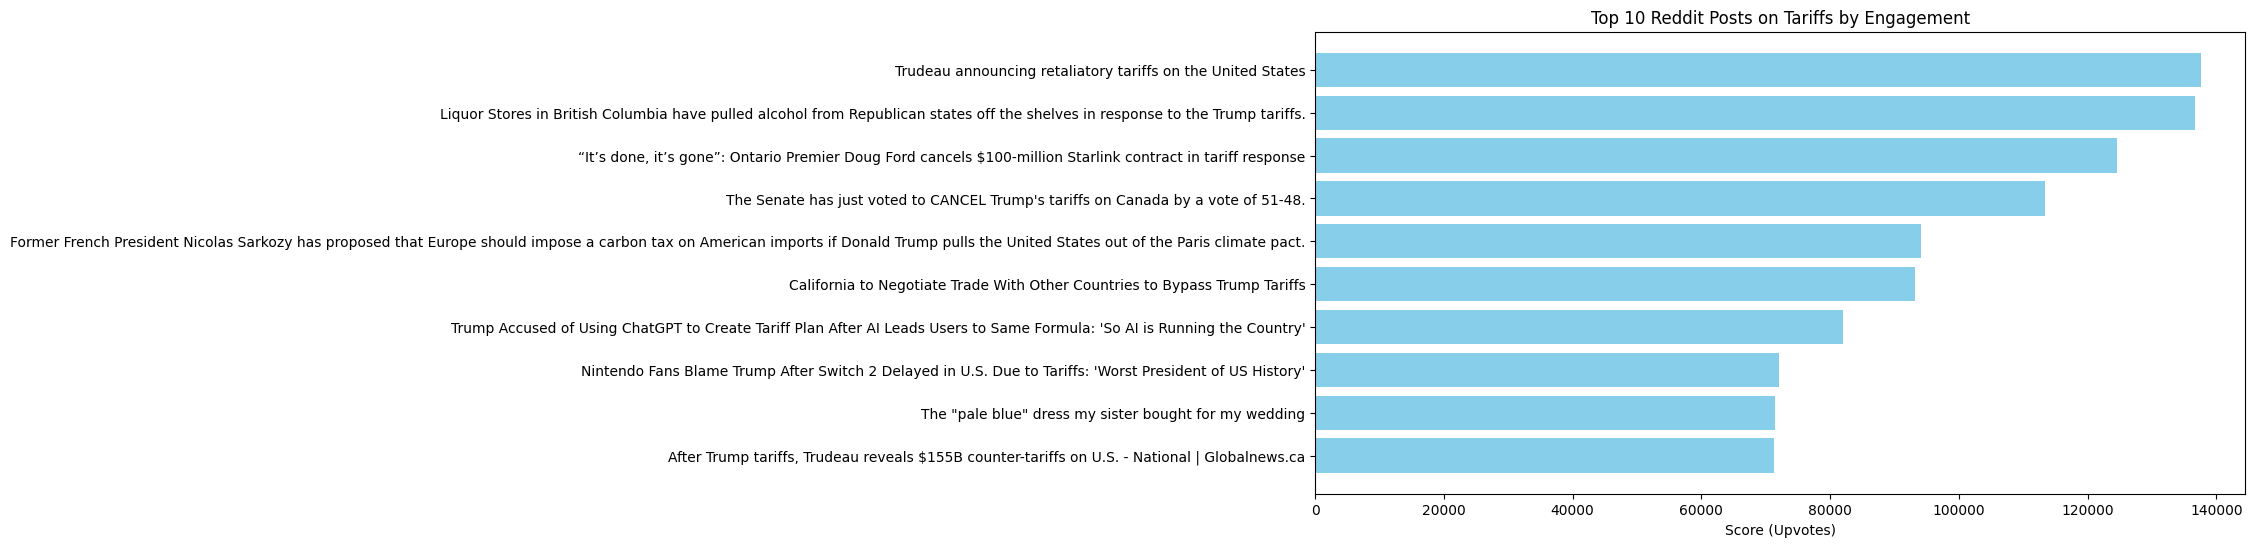

In [ ]:
# Bar chart: Top post scores
top_posts = posts_df.sort_values(by="score", ascending=False).head(10)

print("Top 10 Most Engaging Reddit Posts on Tariffs:\n")
print(top_posts[['title', 'author', 'score', 'created_utc', 'matched_keyword']].to_string(index=False))

plt.figure(figsize=(12, 6))
plt.barh(top_posts['title'], top_posts['score'], color='skyblue')
plt.xlabel("Score (Upvotes)")
plt.title("Top 10 Reddit Posts on Tariffs by Engagement")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Sentiment Analysis

In this section we want to analyze the sentiment of both posts and comments related to the Tariff topic. Our final goal is to categorize entries into the classes: positive sentiment, negative sentiment and neutral sentiment.

In the end we want to look on the the temporal evolution of the sentiment, and analyze if something strange happened in some particular days.



**Libraries setup**

**Transformers** are a type of deep learning model specifically designed to handle sequential data like text, using a mechanism called "attention" to understand relationships between words, no matter how far apart they are. Unlike older models, transformers can process all parts of the input at once, making them faster and better at capturing context.


In [ ]:
!pip install transformers torch --quiet
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.3 MB/s eta 0:00:00


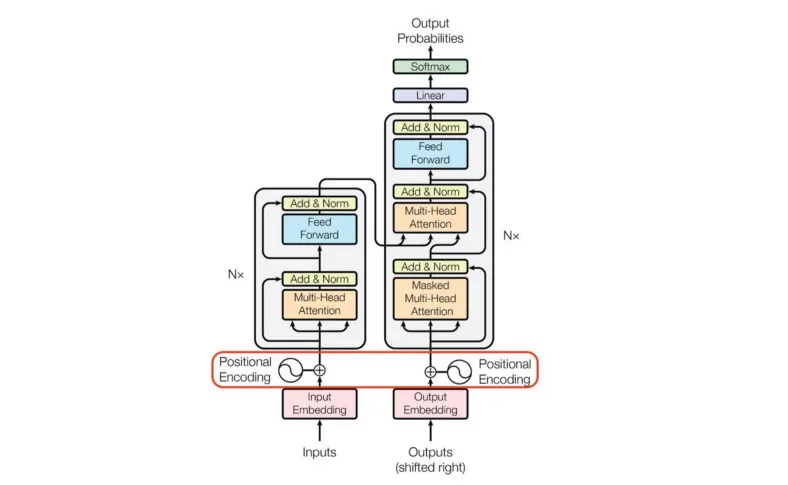

**BERT: Bidirectional Encoder Representations from Transformers**

For my case, the transformer model (BERT) reads Reddit posts about tariffs, breaks the text into tokens, and processes them through multiple layers to understand the overall sentiment.

It then classifies each post into a rating from 1 to 5 stars based on its emotional tone, helping us automatically detect whether people are expressing positive, neutral, or negative opinions.



In [ ]:
# Pre trained model : BERT multilingue, fine-tuned for sentiment analysis
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create sentiment analysis pipeline: tokenize text, pass it through the model , decode output.
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Device set to use cuda:0


**ENCODER- ONLY ARCHITECTURE**:

Bert is simply a particular type of Transformer that has an **ENCODER ONLY** architectue: the goal of this structure is the create a vector representation of the input, that gives context based on position of word in sentence.

Generally we pass the input embeddings of a word and then apply positional encoding in a sentence, we get word vectors which have a positional info i.e context.


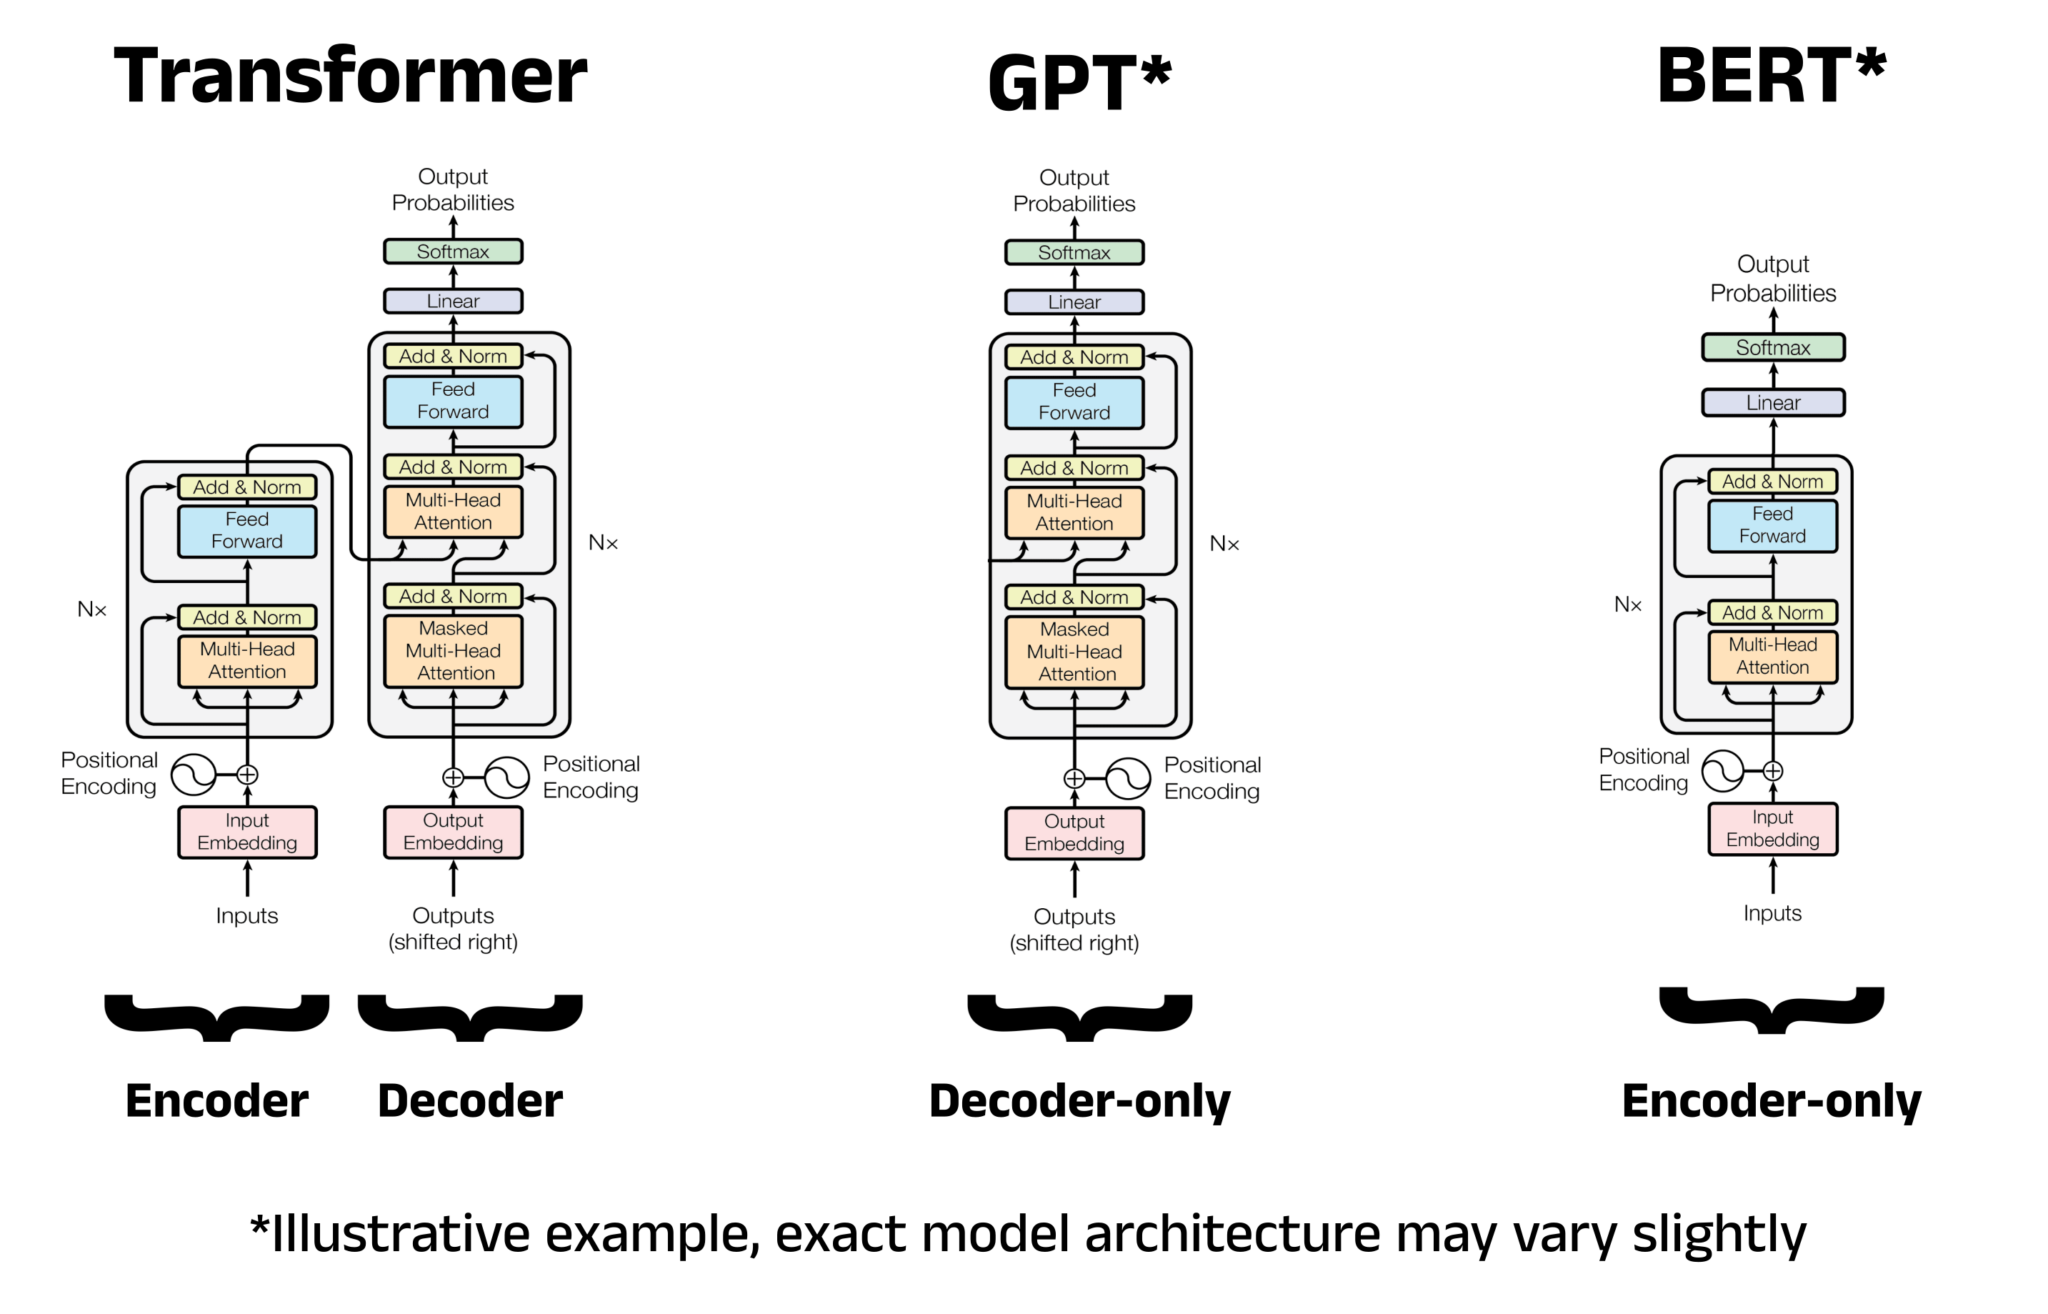

**INPUT EMBEDDING**

How are we going to generate the embeddings from the word token inputs?
These initial embeddings constructed from a combination of three kinds of embeddings.

1. **Token Embeddings**: These are the pre trained embeddings. (Word Pieces Embeddings of vocabulary size 30K).
2. **Sentence Embeddings**: It is nothing but the sentence number that is encoded into a vector.
3. **Position Embeddings**: It is the position of a word within the sentence that is encoded into a vector.

Adding these three vectors together we get an embedding vector that we use as an input to BERT.


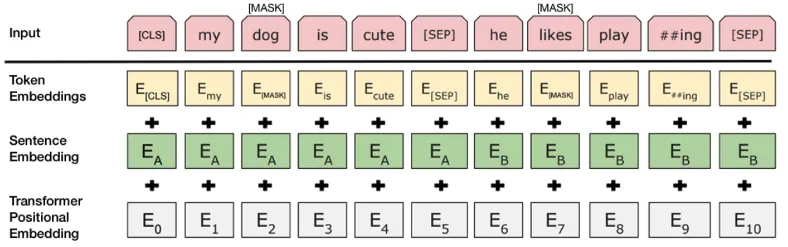

**PRE TRAINING**

The goal of pre training is to make learn BERT what is language and also what is the context. Basically BERT learns language by training on two unsupervised tasks simultaneously. They are:
1. **Masked Language Modelling(MLM)** : The goal is to find these word tokens which are masked(like fill in the blanks). It helps BERT understand bidirectional context within a sentence.
2. **Next Sentence Prediction(NSP)**: BERT takes in the sentences and determines which sentence comes after the other. Because of this, BERT understands the context across different sentences themselves.

Now, using both(MLM, NSP) BERT gets a good understanding of the language. Generally these two are trained simultaneously in practise.


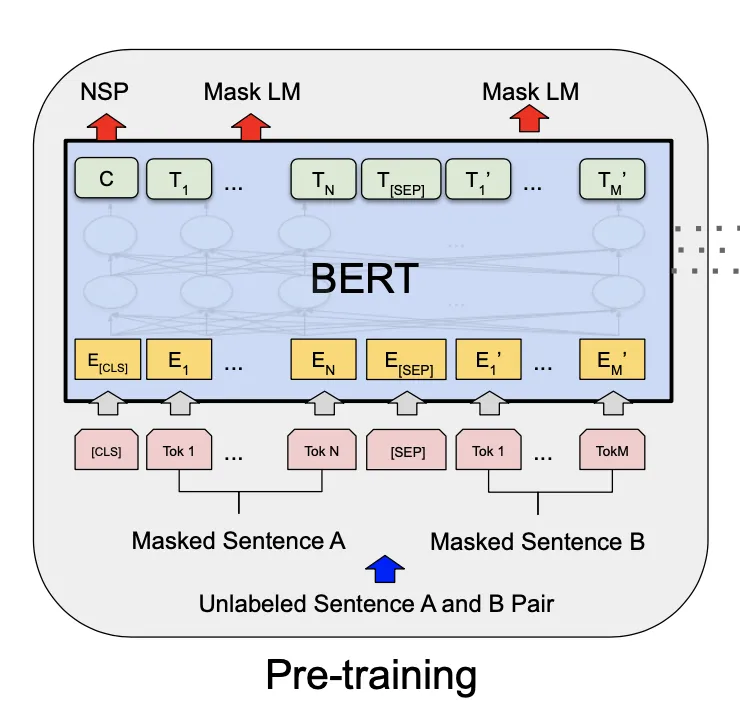

We analyze posts from 2025 only

In [ ]:
# Convert created_utc to datetime
posts_df['created_utc'] = pd.to_datetime(posts_df['created_utc'])

# Filtra solo aprile 2025
posts_apr_2025 = posts_df[
    (posts_df['created_utc'].dt.year == 2025) &
    (posts_df['created_utc'].dt.month == 4)
].copy()

# analyzed text : title + text
texts_posts_apr_2025 = (posts_apr_2025['title'].fillna('') + ' ' + posts_apr_2025['text'].fillna('')).str.slice(0, 512)



In [ ]:
comments_df['comment_created_utc'] = pd.to_datetime(comments_df['comment_created_utc'])

# Filter only comments from april 2025
comments_apr_2025 = comments_df[
    (comments_df['comment_created_utc'].dt.year == 2025) &
    (comments_df['comment_created_utc'].dt.month == 4)
].copy()


texts_comments_apr_2025 = comments_apr_2025['comment_body'].fillna('').str.slice(0, 512)

In [ ]:
# Sentiment analysis posts
results_posts_apr = sentiment_pipeline(texts_posts_apr_2025.tolist())

# Extract labels and scores
sentiment_labels_posts = pd.Series([r['label'] for r in results_posts_apr], index=posts_apr_2025.index)
sentiment_scores_posts = pd.Series([r['score'] for r in results_posts_apr], index=posts_apr_2025.index)

# Map categories
def map_sentiment(label):
    if label in ['1 star', '2 stars']:
        return 'negative'
    elif label == '3 stars':
        return 'neutral'
    else:
        return 'positive'

sentiment_categories_posts = sentiment_labels_posts.apply(map_sentiment)



In [ ]:
# Sentiment analysis comments
results_comments_apr = sentiment_pipeline(texts_comments_apr_2025.tolist())

# Extract label and score
sentiment_labels_comments = pd.Series([r['label'] for r in results_comments_apr], index=comments_apr_2025.index)
sentiment_scores_comments = pd.Series([r['score'] for r in results_comments_apr], index=comments_apr_2025.index)

# Map categories
sentiment_categories_comments = sentiment_labels_comments.apply(map_sentiment)

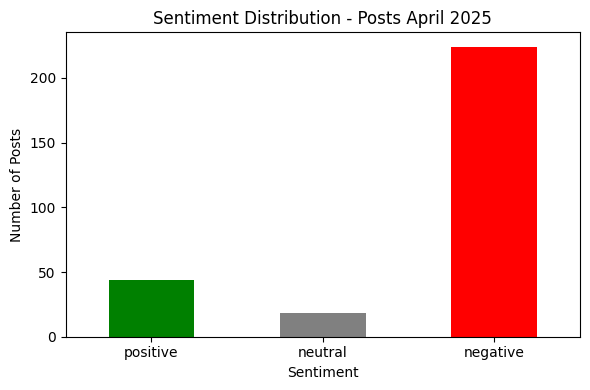

In [ ]:
# Sentiment distribution posts April 2025
plt.figure(figsize=(6, 4))
sentiment_categories_posts.value_counts().loc[['positive', 'neutral', 'negative']].plot(
    kind='bar', color=['green', 'gray', 'red']
)
plt.title("Sentiment Distribution - Posts April 2025")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



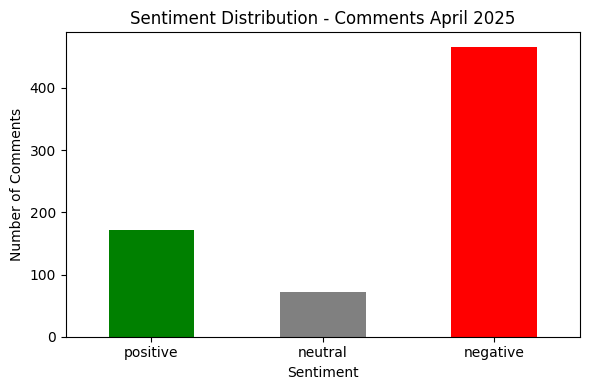

In [ ]:
# Sentiment Distribution comments april 2025
plt.figure(figsize=(6, 4))
sentiment_categories_comments.value_counts().loc[['positive', 'neutral', 'negative']].plot(
    kind='bar', color=['green', 'gray', 'red']
)
plt.title("Sentiment Distribution - Comments April 2025")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

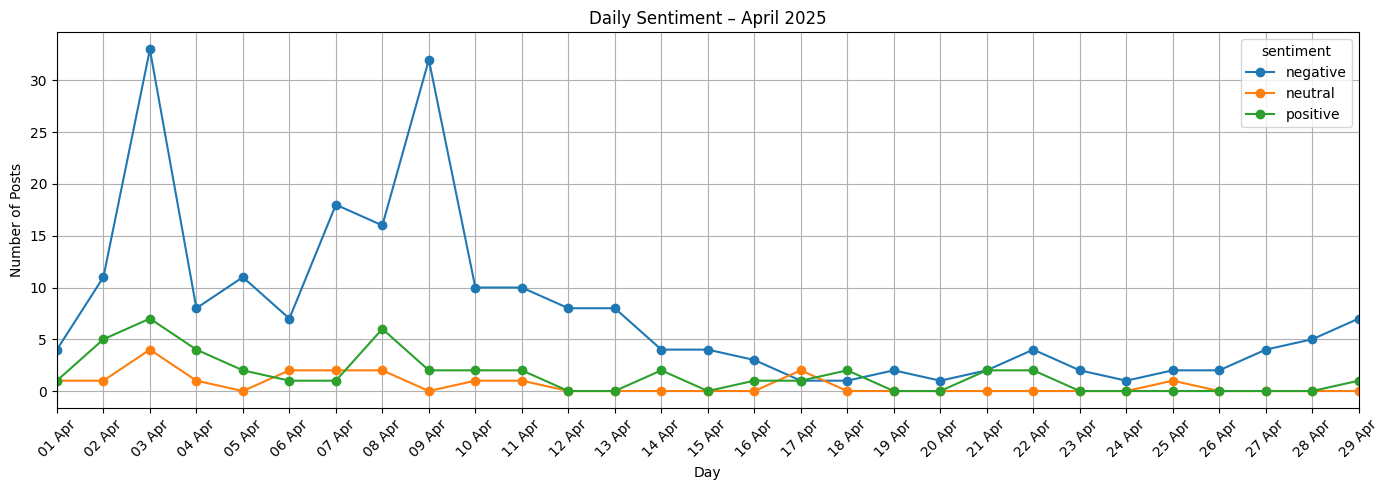

In [ ]:
# Filter April 2025
mask_april = (pd.to_datetime(posts_apr_2025['created_utc']) >= "2025-04-01") & (pd.to_datetime(posts_apr_2025['created_utc']) <= "2025-04-30")
df_april = posts_apr_2025[mask_april].copy()

df_april['sentiment'] = sentiment_categories_posts[mask_april].values

# Create a 'date' column just for this analysis
df_april['date'] = pd.to_datetime(df_april['created_utc'], errors='coerce').dt.normalize()

daily_sentiment_april = (
    df_april.groupby(['date', 'sentiment'])
            .size()
            .unstack(fill_value=0)
            .sort_index()
)

# Plot
ax = daily_sentiment_april.plot(marker='o', figsize=(14, 5))
ax.set_title("Daily Sentiment – April 2025")
ax.set_xlabel("Day")
ax.set_ylabel("Number of Posts")
ax.grid(True)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


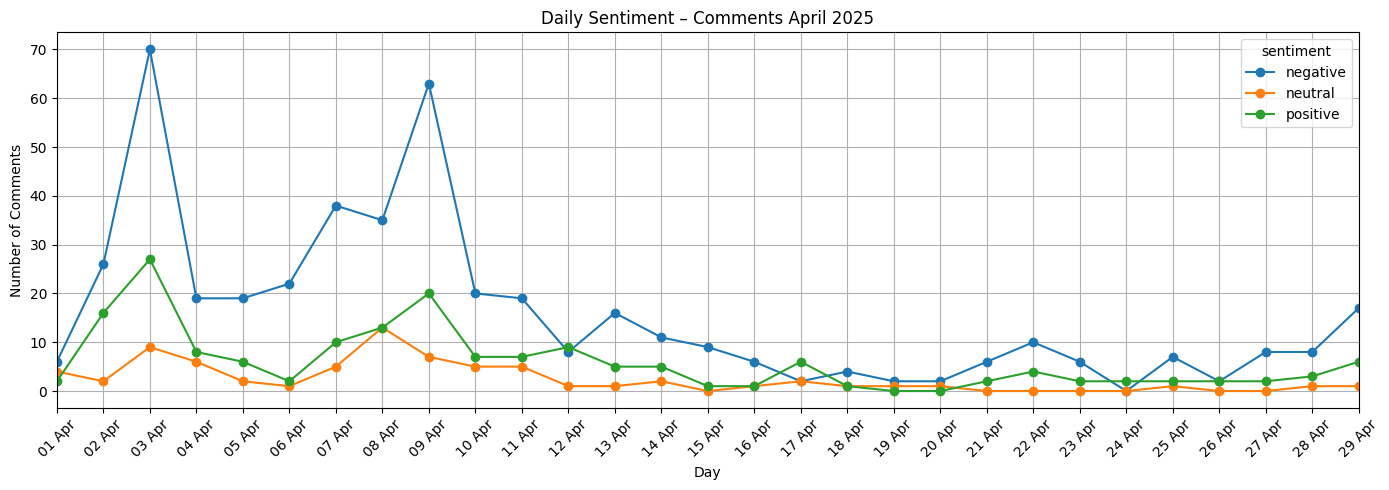

In [ ]:
# Filter comments in April 2025
mask_april_comments = (
    (pd.to_datetime(comments_apr_2025['comment_created_utc']) >= "2025-04-01") &
    (pd.to_datetime(comments_apr_2025['comment_created_utc']) <= "2025-04-30")
)
comments_april = comments_apr_2025[mask_april_comments].copy()

# Add sentiment to comments
comments_april['sentiment'] = sentiment_categories_comments[mask_april_comments].values

# Create a 'date' column for grouping
comments_april['date'] = pd.to_datetime(comments_april['comment_created_utc'], errors='coerce').dt.normalize()

# Group by date and sentiment
daily_sentiment_comments_april = (
    comments_april.groupby(['date', 'sentiment'])
                  .size()
                  .unstack(fill_value=0)
                  .sort_index()
)

# Plot
ax = daily_sentiment_comments_april.plot(marker='o', figsize=(14, 5))
ax.set_title("Daily Sentiment – Comments April 2025")
ax.set_xlabel("Day")
ax.set_ylabel("Number of Comments")
ax.grid(True)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

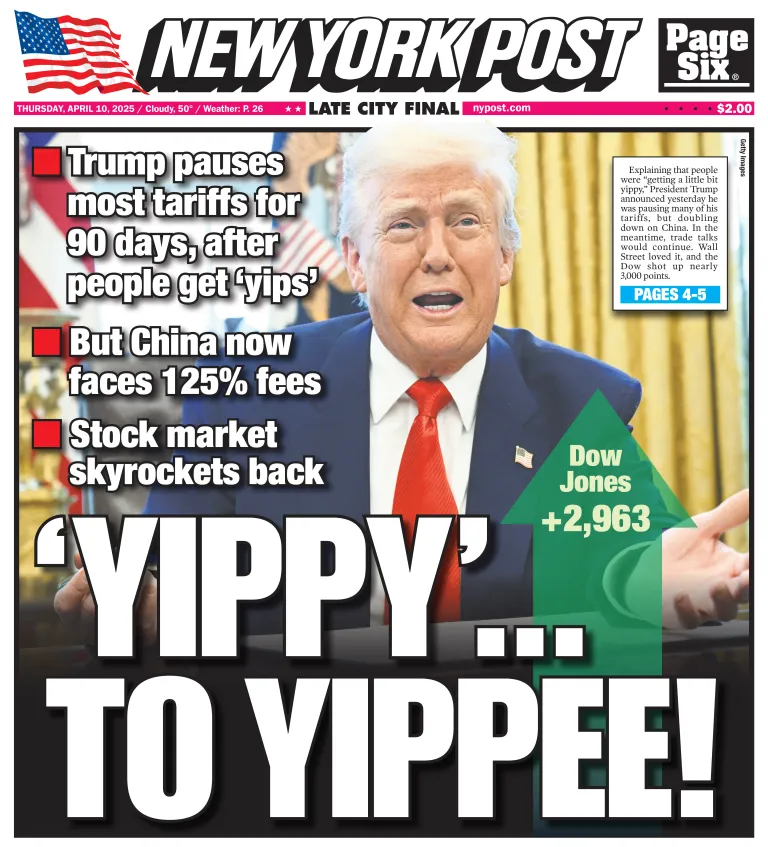

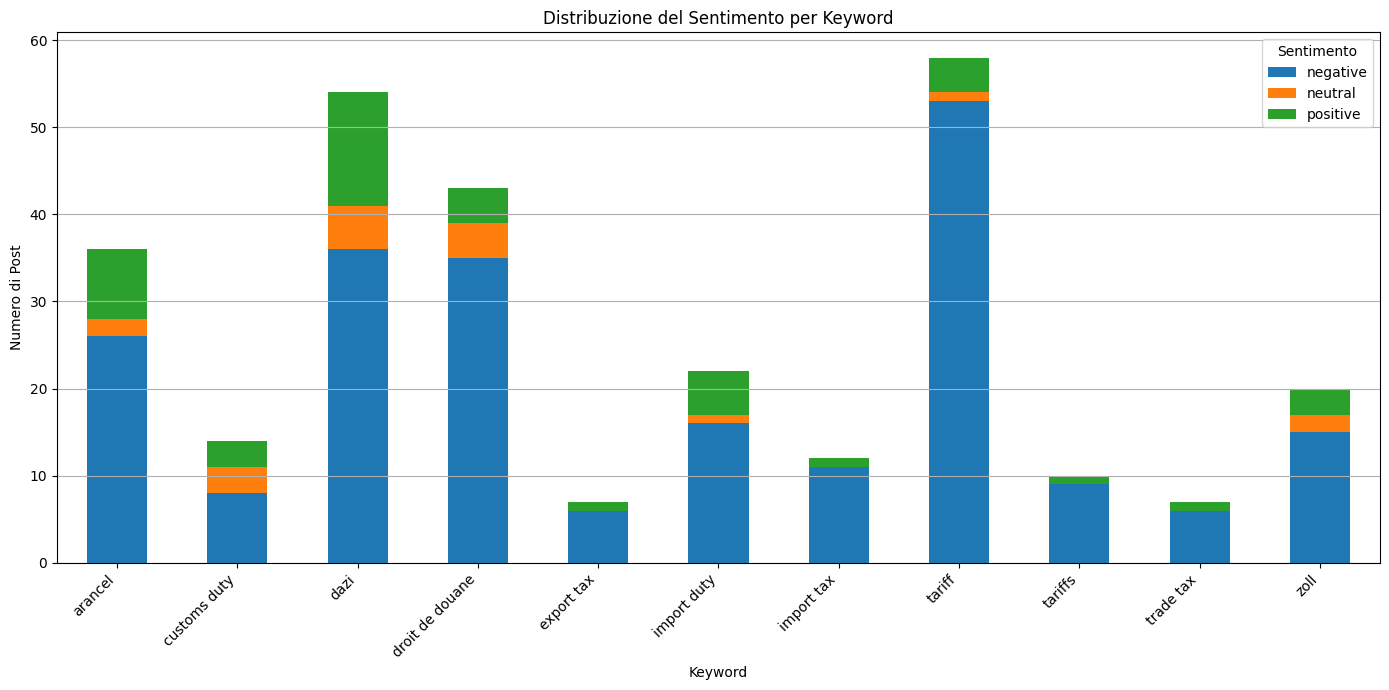

In [ ]:
# Group by keyword e sentimento
sentiment_keyword_counts = df_april.groupby(['matched_keyword', 'sentiment']).size().unstack(fill_value=0)

sentiment_keyword_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Distribuzione del Sentimento per Keyword')
plt.xlabel('Keyword')
plt.ylabel('Numero di Post')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentimento')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Resources:
1. A Complete Guide to BERT with Code: https://towardsdatascience.com/a-complete-guide-to-bert-with-code-9f87602e4a11/

2. The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning): https://jalammar.github.io/illustrated-bert/

3. Ny posts covers: https://nypost.com/covers/

4. Chatgpt: code cleaning